# National Boundaries Dataset
> Εξετάζουμε την μορφή του National Boundaries Dataset και την μετατροπή του σε μορφη RDF.

Το National Boundary Database(2014)<cite data-cite="7747773/GSWXXBJF"></cite> είναι ενα dataset που περιγράφει τις διοικητικές μονάδες των Ηνωμένων Πολιτειών της Αμερικής . Για την μετατροπή των δεδομένων σε RDF data και την κατασκεύη του γράφου χρησιμοποιούμε το εργαλείο GeoTriples<cite data-cite="7747773/HKUUMBMQ"></cite> .


Ας πάρουμε για παράδειγμα την πολιτεία της **Νέας Υόρκης** . Στο φάκελο data έχουμε το αρχείο gdb , που περιλαμβάνει η NBD για την πολιτεια .Αρχικα , θα κάνουμε χρήση των βιβλιοθηκών fiona <cite data-cite="7747773/TE5IM5WW"></cite> και geopandas <cite data-cite="7747773/AUZNIT2Q"></cite> για την άναγνωση των δεδομένων του gdb.


In [66]:
%matplotlib inline

In [67]:
import fiona 
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

## Νεα Υορκη
<img src="images/1280px-Flag_of_New_York.svg.png" alt="Flag" width="300"  />
<img src="images/New_York_in_United_States.svg" alt="State" width="300" />
Ξεκινάμε διαβάζοντας το αρχείο και εκτύπωνοντας τα δίαφορα layers.

In [68]:
filepath = "./data/GOVTUNIT_New_York_State_GDB.gdb"

layers = fiona.listlayers(filepath)
print(layers)
print(len(layers))

['GU_CountyOrEquivalent', 'GU_IncorporatedPlace', 'GU_StateOrTerritory', 'GU_MinorCivilDivision', 'GU_Reserve', 'GU_NativeAmericanArea', 'GU_Jurisdictional', 'GU_UnincorporatedPlace', 'GU_PLSSFirstDivision', 'GU_PLSSSpecialSurvey', 'GU_PLSSTownship', 'BPFeatureToMetadata', 'Meta_DatasetDetail', 'Meta_ProcessDetail']
14


Το αρχείο περιέχει 14 συνολικά layers . Απο αυτά τα 11 παρακάτω αντιστοιχούν σε γεωγραφικά δεδομένα , ενω τα υπόλοιπα περιέχουν πληροφορίες για τα μεταδεδομένα .

In [69]:
gulayers = ['GU_CountyOrEquivalent', 'GU_IncorporatedPlace', 'GU_StateOrTerritory', 
            'GU_MinorCivilDivision', 'GU_Reserve', 'GU_NativeAmericanArea', 
            'GU_Jurisdictional', 'GU_UnincorporatedPlace', 'GU_PLSSFirstDivision', 
            'GU_PLSSSpecialSurvey', 'GU_PLSSTownship']

Εξετάζουμε την μορφη του κάθε layer.

Αρχικα , παρατηρούμε οτι το πιο πολυπληθές dataset είναι το GU_MinorCivilDivision με 1170 εγγραφές, ένω το λιγοτερο πολυπληθες - μεγαλυτερο του μηδεν - ειναι το StateOrTerritory με 7. 

In [70]:
shapesdf = pd.DataFrame(columns=['Layer Name','Entries','Features'])
dfDict = {}
for idx,layer in enumerate(layers):
    gdf = gpd.read_file(filepath,layer=layer)
    dfDict[layer] = gdf
    shapesdf.loc[idx] = [layer,gdf.shape[0],gdf.shape[1]]
shapesdf = shapesdf.sort_values('Entries')
shapesdf.head(n=14)

,Layer Name,Entries,Features
8,GU_PLSSFirstDivision,0,21
9,GU_PLSSSpecialSurvey,0,20
10,GU_PLSSTownship,0,21
2,GU_StateOrTerritory,7,17
5,GU_NativeAmericanArea,13,18
12,Meta_DatasetDetail,17,25
13,Meta_ProcessDetail,17,15
6,GU_Jurisdictional,43,21
4,GU_Reserve,64,18
0,GU_CountyOrEquivalent,90,20


## State Or Territory


Το Dataset απoτελείται απο 7 εγγραφές . Κάθε μια απο τις εγγράφες αντιστοιχεί σε μια συνορεύουσα πολιτεία .Παρατηρούμε πολλές στήλες που αντιστοιχούν σε χρήσιμες πληροφορίες για κάθε πολιτεία . 
1. Την πηγή του dataset 
2. Την Ημερομηνία δημιουργίας 
3. Ο αριθμός FIPS που είναι μοναδικός για κάθε πολιτεία 
4. Το όνομα της πολιτείας 
5. Τον πληθησμό (δεν είναι συμπληρωμένο) 
6. Το μέγεθος 
7. την γεωμετρική αναπαράσταση.

In [71]:
stateDf = dfDict['GU_StateOrTerritory']
stateDf.head(n=7)

,Permanent_Identifier,Source_FeatureID,Source_DatasetID,Source_DataDesc,Source_Originator,Data_Security,Distribution_Policy,LoadDate,FCode,State_FIPSCode,State_Name,Population2000,AreaSqKM,GNIS_ID,Shape_Length,Shape_Area,geometry
0,0c35ddcb-9001-4c4f-a99e-dc165ac09a2e,36,fdb7e03d-12ca-49a4-bfe6-437ccdda7183,"2018 TIGER/Line Shapefile, Current State and E...",U.S. Census Bureau,5,E4,2019-02-13T00:00:00,61100,36,New York,None,141296.128900,1779796,25.938952,15.580703,"MULTIPOLYGON (((-79.31214 42.68681, -79.24977 ..."
1,3f74edca-a184-4133-a3b2-ce01c2d8573d,25,fdb7e03d-12ca-49a4-bfe6-437ccdda7183,"2018 TIGER/Line Shapefile, Current State and E...",U.S. Census Bureau,5,E4,2019-02-13T00:00:00,61100,25,Massachusetts,None,27335.048586,606926,12.000554,2.977855,"MULTIPOLYGON (((-71.49826 42.01727, -71.49907 ..."
2,5d5e9018-2522-4be4-a755-08cf139945f2,44,fdb7e03d-12ca-49a4-bfe6-437ccdda7183,"2018 TIGER/Line Shapefile, Current State and E...",U.S. Census Bureau,5,E4,2019-02-13T00:00:00,61100,44,Rhode Island,None,4001.456019,1219835,3.675822,0.432129,"MULTIPOLYGON (((-71.78970 41.72520, -71.78971 ..."
3,0d88ac84-d840-42d6-8630-8a74300edcd1,50,fdb7e03d-12ca-49a4-bfe6-437ccdda7183,"2018 TIGER/Line Shapefile, Current State and E...",U.S. Census Bureau,5,E4,2019-02-13T00:00:00,61100,50,Vermont,None,24904.594000,1779802,9.832536,2.798214,"MULTIPOLYGON (((-73.31328 44.26413, -73.31274 ..."
4,7cec439c-4b37-477a-9103-259edcdd85bc,09,fdb7e03d-12ca-49a4-bfe6-437ccdda7183,"2018 TIGER/Line Shapefile, Current State and E...",U.S. Census Bureau,5,E4,2019-02-13T00:00:00,61100,09,Connecticut,None,14358.115826,1779780,5.718063,1.550106,"MULTIPOLYGON (((-73.51808 41.66672, -73.51807 ..."
5,cf7f843c-9d39-446a-8f66-806075fcbf71,34,fdb7e03d-12ca-49a4-bfe6-437ccdda7183,"2018 TIGER/Line Shapefile, Current State and E...",U.S. Census Bureau,5,E4,2019-02-13T00:00:00,61100,34,New Jersey,None,22592.685085,1779795,8.546806,2.386717,"MULTIPOLYGON (((-75.18960 40.59178, -75.18977 ..."
6,64d9599c-be76-4088-85a6-ac4a4ec31a1b,42,fdb7e03d-12ca-49a4-bfe6-437ccdda7183,"2018 TIGER/Line Shapefile, Current State and E...",U.S. Census Bureau,5,E4,2019-02-13T00:00:00,61100,42,Pennsylvania,None,119279.036122,1779798,17.837676,12.747187,"MULTIPOLYGON (((-80.51935 41.84956, -80.51938 ..."


Καλώντας την συνάρτηση plot() παράγουμε ενα γράφημα για με τις πληροφορίες του dataset .

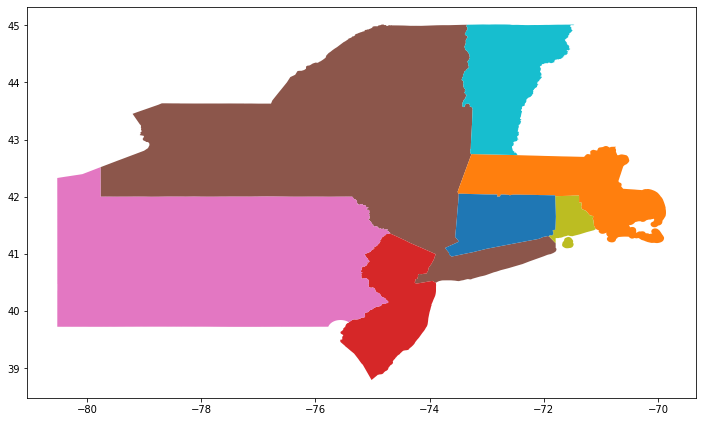

In [72]:
stateDf.plot(column='State_Name',figsize=(12, 20))

## County Or Equivalent
Συνεχίζουμε μελετώντας το layer GU_CountyOrEquivalent .Το dataset περιέχει παρόμοια features με το StateOrTerritory . Περιέχει , επίσης και εγγραφές απο γειτονικές πολιτείες ,(πχ. Wayne County ,PA)

### Data

In [73]:
countyDf = dfDict['GU_CountyOrEquivalent']
nycounties = countyDf.loc[countyDf['State_Name'] == 'New York']
countyDf.head(n=7)

,Permanent_Identifier,Source_FeatureID,Source_DatasetID,Source_DataDesc,Source_Originator,Data_Security,Distribution_Policy,LoadDate,FCode,State_FIPSCode,State_Name,County_FIPSCode,County_Name,StCo_FIPSCode,Population2000,AreaSqKM,GNIS_ID,Shape_Length,Shape_Area,geometry
0,3b6354aa-0aba-4b1f-869e-1ff3f73e5861,36003,2b97941f-8f2a-4cac-ba12-cfdde839faf4,"2018 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,5,E4,2019-02-20T00:00:00,61200,36,New York,003,Allegany,36003,None,2679.029191,974100,2.198456,0.292288,"MULTIPOLYGON (((-78.30919 42.26113, -78.30920 ..."
1,d4001bdd-0698-4d27-9e27-5e5be33aa379,36097,2b97941f-8f2a-4cac-ba12-cfdde839faf4,"2018 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,5,E4,2019-02-20T00:00:00,61200,36,New York,097,Schuyler,36097,None,886.651825,974146,1.659720,0.096942,"MULTIPOLYGON (((-76.73391 42.29372, -76.73392 ..."
2,9dfd3c57-f0d0-44cd-b9f4-e0f201717d71,42127,2b97941f-8f2a-4cac-ba12-cfdde839faf4,"2018 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,5,E4,2019-02-20T00:00:00,61200,42,Pennsylvania,127,Wayne,42127,None,1944.081751,1213692,2.633211,0.210118,"MULTIPOLYGON (((-75.45976 41.59504, -75.45980 ..."
3,3ef00c83-bd33-4dbd-a874-1179e1120f53,36091,2b97941f-8f2a-4cac-ba12-cfdde839faf4,"2018 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,5,E4,2019-02-20T00:00:00,61200,36,New York,091,Saratoga,36091,None,2185.451813,974143,2.491212,0.241674,"MULTIPOLYGON (((-74.12433 43.15390, -74.12457 ..."
4,acf8f726-7f0b-4c18-940e-759fec8fd1c1,36041,2b97941f-8f2a-4cac-ba12-cfdde839faf4,"2018 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,5,E4,2019-02-20T00:00:00,61200,36,New York,041,Hamilton,36041,None,4682.194334,974119,3.444040,0.522459,"MULTIPOLYGON (((-74.82011 43.81851, -74.82038 ..."
5,ec52c387-b1b2-411f-a5ef-d1f9d04501df,36089,2b97941f-8f2a-4cac-ba12-cfdde839faf4,"2018 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,5,E4,2019-02-20T00:00:00,61200,36,New York,089,St. Lawrence,36089,None,7307.176197,977309,3.798192,0.826795,"MULTIPOLYGON (((-74.93945 44.98442, -74.93447 ..."
6,cd261b42-7af5-4974-9714-a8ab2baccfc7,36027,2b97941f-8f2a-4cac-ba12-cfdde839faf4,"2018 TIGER/Line Shapefile, Current County and ...",U.S. Census Bureau,5,E4,2019-02-20T00:00:00,61200,36,New York,027,Dutchess,36027,None,2137.634520,974112,2.225778,0.231450,"MULTIPOLYGON (((-73.94041 41.87298, -73.94043 ..."


### Map

62


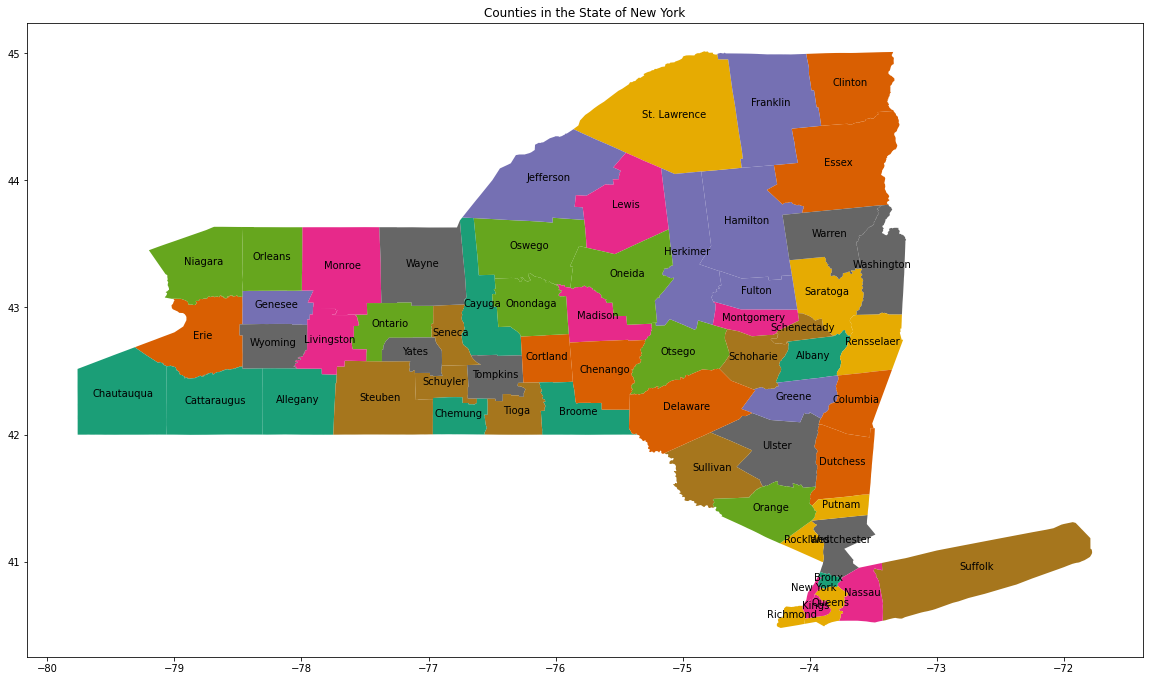

In [74]:
nycounties.plot(column='Source_FeatureID',figsize=(20, 30),cmap="Dark2")
plt.title('Counties in the State of New York')
print(nycounties.shape[0])
for idx, row in nycounties.iterrows():
    plt.annotate(s=row['County_Name'],xy=row.geometry.centroid.coords[0],
                 horizontalalignment='center')


## Minor Civil Division


### Data

In [77]:
minor = dfDict['GU_MinorCivilDivision'].loc[dfDict['GU_MinorCivilDivision']['State_Name'] == 'New York']
minor.head(n=7)

,Permanent_Identifier,Source_FeatureID,Source_DatasetID,Source_DataDesc,Source_Originator,Data_Security,Distribution_Policy,LoadDate,FCode,State_Name,MinorCivilDivision_FIPSCode,MinorCivilDivision_Name,AreaSqKM,GNIS_ID,Shape_Length,Shape_Area,geometry
0,9bd8f5c2-3078-4dfd-b91e-a05b308e77bf,3604342752,96cc8b4f-01cf-4089-aa13-a8b43d8e1837,Minor Civil Divsion - 2018,US Census Bureau,5,E4,2019-02-04T00:00:00,61346,New York,42752,Little Falls,58.282337,979158,0.432772,0.006436,"MULTIPOLYGON (((-74.92909 43.08087, -74.92191 ..."
1,8143a47a-10d7-458e-8cdc-e59c3964b58d,3602102099,96cc8b4f-01cf-4089-aa13-a8b43d8e1837,Minor Civil Divsion - 2018,US Census Bureau,5,E4,2019-02-04T00:00:00,61346,New York,02099,Ancram,110.680764,978679,0.480054,0.012034,"MULTIPOLYGON (((-73.65307 42.08809, -73.64334 ..."
3,fa8ac20d-d4e1-4f14-8c02-bece735c03ae,3605581402,96cc8b4f-01cf-4089-aa13-a8b43d8e1837,Minor Civil Divsion - 2018,US Census Bureau,5,E4,2019-02-04T00:00:00,61346,New York,81402,Wheatland,79.440386,979633,0.480102,0.008771,"MULTIPOLYGON (((-77.90975 42.99050, -77.90974 ..."
4,6461cc68-fcab-4ee9-b0fd-641f3681b461,3611745645,96cc8b4f-01cf-4089-aa13-a8b43d8e1837,Minor Civil Divsion - 2018,US Census Bureau,5,E4,2019-02-04T00:00:00,61346,New York,45645,Marion,75.755946,979199,0.383390,0.008385,"MULTIPOLYGON (((-77.25222 43.12458, -77.25211 ..."
5,ef99979c-d8a4-4d4e-abf1-976029a09543,3602701693,96cc8b4f-01cf-4089-aa13-a8b43d8e1837,Minor Civil Divsion - 2018,US Census Bureau,5,E4,2019-02-04T00:00:00,61346,New York,01693,Amenia,113.157727,978674,0.454551,0.012263,"MULTIPOLYGON (((-73.61405 41.88822, -73.60102 ..."
6,7adc88f9-2d68-4a64-a9d8-5248833b9d23,3602705452,96cc8b4f-01cf-4089-aa13-a8b43d8e1837,Minor Civil Divsion - 2018,US Census Bureau,5,E4,2019-02-04T00:00:00,61346,New York,05452,Beekman,79.517563,978718,0.419661,0.008588,"MULTIPOLYGON (((-73.76518 41.62638, -73.76337 ..."
14,73260e99-0c91-4d0c-981a-9188c8e731be,3602720819,96cc8b4f-01cf-4089-aa13-a8b43d8e1837,Minor Civil Divsion - 2018,US Census Bureau,5,E4,2019-02-04T00:00:00,61346,New York,20819,Dover,145.900023,978906,0.500141,0.015777,"MULTIPOLYGON (((-73.63604 41.70459, -73.63604 ..."


### Map

Text(0.5, 1.0, 'Minor Civil Division in the State of New York')

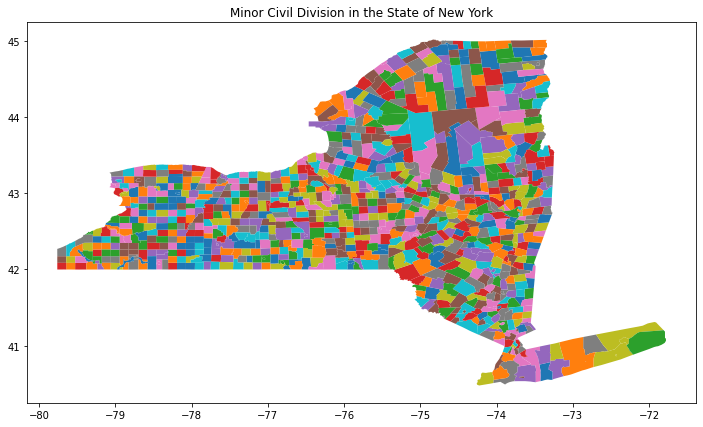

In [78]:
minor.plot(column='GNIS_ID',figsize=(12, 20))
plt.title('Minor Civil Division in the State of New York')

## Reserves

### Data

In [79]:
reserve = dfDict['GU_Reserve']
print(reserve.shape)
reserve.head()

(64, 18)


,Permanent_Identifier,Source_FeatureID,Source_DatasetID,Source_DataDesc,Source_Originator,Data_Security,Distribution_Policy,LoadDate,GNIS_ID,Name,AreaSqKM,FType,FCode,AdminType,OwnerOrManagingAgency,Shape_Length,Shape_Area,geometry
0,08c97dab-53b9-4b6a-a288-11fb457cee41,APPA,{16008942-AC1D-4FC5-9C36-909B2D073EEF},National Park Boundaries 6/2019,National Park Service,5,E4,2019-08-06T07:42:42,2766084,Appalachian National Scenic Trail,1180.968000,674,67400,1,13,69.053945,0.125902,"MULTIPOLYGON (((-72.09462 43.79000, -72.09514 ..."
1,{6615FEEC-2D2F-468B-985B-20969E9E5C87},None,{D6562B16-5194-4155-8D58-F9447ECA3144},NCA National Cemetery Boundaries 2014,US Geological Survey - National Geospatial Tec...,5,E4,2014-02-03T11:05:50,2061983,Bath National Cemetery,0.117353,670,67000,1,9,0.014374,0.000013,"MULTIPOLYGON (((-77.35092 42.35167, -77.35014 ..."
2,{2876C912-853F-45B6-9CD9-8C9028EF8F6C},None,{D6562B16-5194-4155-8D58-F9447ECA3144},NCA National Cemetery Boundaries 2014,US Geological Survey - National Geospatial Tec...,5,E4,2014-02-03T11:05:50,958291,Cypress Hills National Cemetery,0.073438,670,67000,1,9,0.016551,0.000008,"MULTIPOLYGON (((-73.88319 40.68945, -73.88263 ..."
3,{2176A179-EBB5-4BD3-AC96-B6D56A9C3A14},None,{D6562B16-5194-4155-8D58-F9447ECA3144},NCA National Cemetery Boundaries 2014,US Geological Survey - National Geospatial Tec...,5,E4,2014-02-03T11:05:50,2076075,Calverton National Cemetery,4.219852,670,67000,1,9,0.095534,0.000451,"MULTIPOLYGON (((-72.82514 40.94530, -72.82401 ..."
4,{C0E89371-E862-4A47-B305-3198B7F006FA},None,{D6562B16-5194-4155-8D58-F9447ECA3144},NCA National Cemetery Boundaries 2014,US Geological Survey - National Geospatial Tec...,5,E4,2014-02-03T11:05:50,955867,Long Island National Cemetery,1.465280,670,67000,1,9,0.052080,0.000156,"MULTIPOLYGON (((-73.40307 40.76488, -73.40195 ..."


### Map

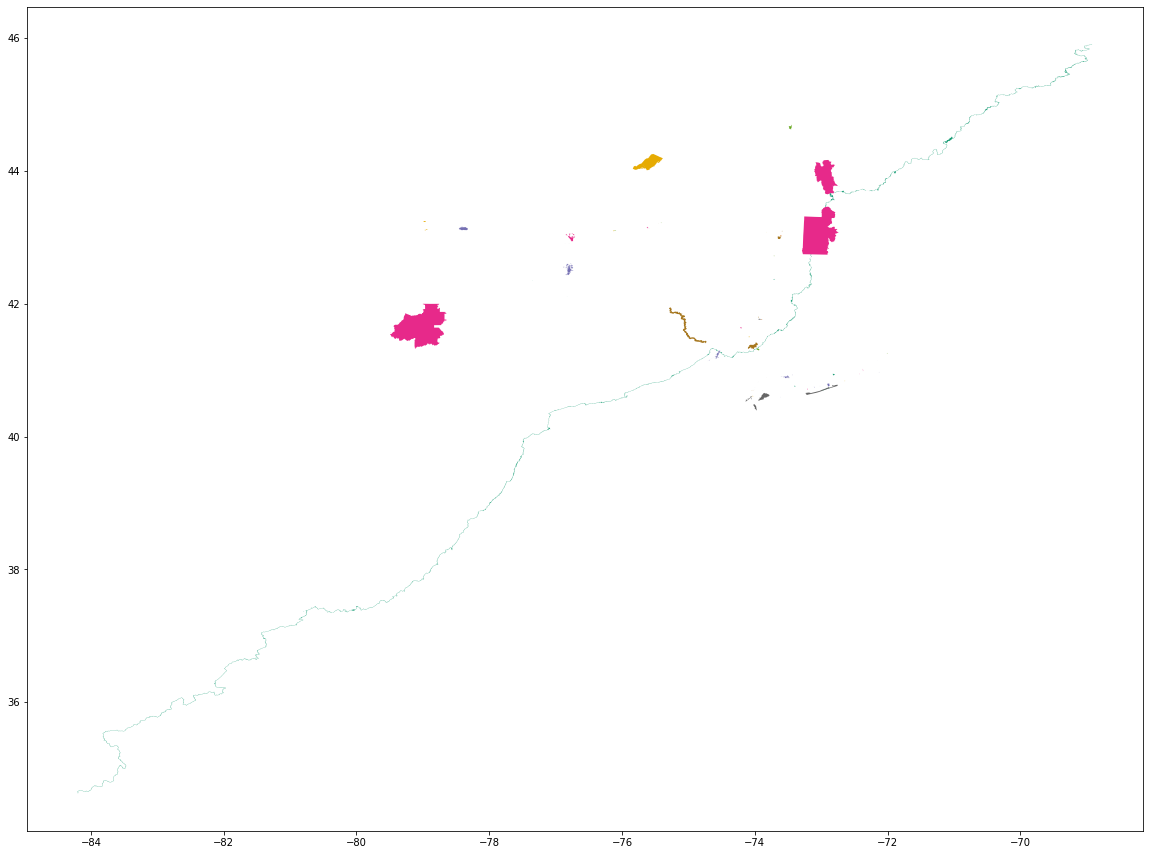

In [80]:
reserve.plot(cmap='Dark2',figsize=(20,20))

## Native American Land

### Data

In [81]:
native = dfDict['GU_NativeAmericanArea']
print(native.shape)
native.head()

(13, 18)


,Permanent_Identifier,Source_FeatureID,Source_DatasetID,Source_DataDesc,Source_Originator,Data_Security,Distribution_Policy,LoadDate,GNIS_ID,Name,AreaSqKM,FType,FCode,NativeAmericanArea_FIPSCode,AdminType,Shape_Length,Shape_Area,geometry
0,b26aa739-29c5-462d-862c-68a6efb88911,2570R,6d8b3a13-db35-4527-ae49-b7c63fbd5227,"TIGER/Line Shapefile, 2018, U.S., American Ind...",US Census Bureau,5,E4,2019-01-30T00:00:00,979312,Onondaga Nation Reservation,24.070573,640,64086,2570R,2,0.234345,0.002655,"MULTIPOLYGON (((-76.18399 42.96976, -76.18109 ..."
1,27c6ad1f-4c6c-4c87-9c24-ff12323afd0f,3320R,6d8b3a13-db35-4527-ae49-b7c63fbd5227,"TIGER/Line Shapefile, 2018, U.S., American Ind...",US Census Bureau,5,E4,2019-01-30T00:00:00,979449,St. Regis Mohawk Reservation,54.361516,640,64086,3320R,2,0.432345,0.006202,"MULTIPOLYGON (((-74.72623 44.99486, -74.72257 ..."
2,82411b22-cafa-48e1-8db7-46b0277d5513,9350R,6d8b3a13-db35-4527-ae49-b7c63fbd5227,"TIGER/Line Shapefile, 2018, U.S., American Ind...",US Census Bureau,5,E4,2019-01-30T00:00:00,210687,Schaghticoke (state) Reservation,1.122121,640,64086,9350R,2,0.048075,0.000121,"MULTIPOLYGON (((-73.51645 41.69102, -73.51613 ..."
3,ef52b135-a929-4fae-a366-ae9edb3beb4d,2555R,6d8b3a13-db35-4527-ae49-b7c63fbd5227,"TIGER/Line Shapefile, 2018, U.S., American Ind...",US Census Bureau,5,E4,2019-01-30T00:00:00,2419043,Oneida Nation Reservation,0.212697,640,64086,2555R,2,0.021204,0.000023,"MULTIPOLYGON (((-75.62333 43.04088, -75.62282 ..."
4,1c02a473-d4c4-40b9-9d56-1db3fec30b2d,4360R,6d8b3a13-db35-4527-ae49-b7c63fbd5227,"TIGER/Line Shapefile, 2018, U.S., American Ind...",US Census Bureau,5,E4,2019-01-30T00:00:00,979564,Tuscarora Nation Reservation,23.524721,640,64086,4360R,2,0.235776,0.002604,"MULTIPOLYGON (((-78.99861 43.17552, -78.99716 ..."


### Map

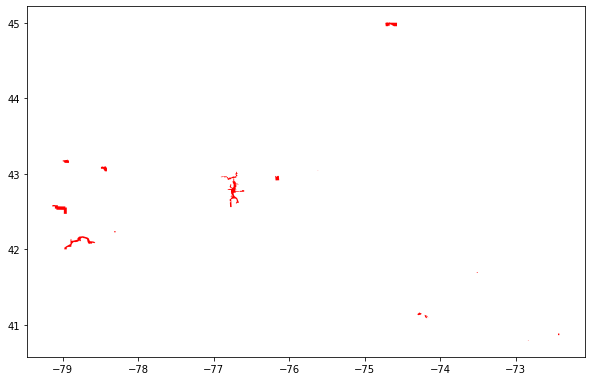

In [82]:
native.plot(color='red',figsize=(10,20),zorder=2)

## Jurisdictional

### Data

In [84]:
juris = dfDict['GU_Jurisdictional']
juris = juris.loc[juris['State_Name'] == 'New York']
print(juris.shape)
juris.head()

(27, 21)


,Permanent_Identifier,Source_FeatureID,Source_DatasetID,Source_DataDesc,Source_Originator,Data_Security,Distribution_Policy,LoadDate,GNIS_ID,Name,...,FType,FCode,Designation,State_FIPSCode,State_Name,AdminType,OwnerOrManagingAgency,Shape_Length,Shape_Area,geometry
16,73ea130b-6413-4376-a465-7613746223f7,3601,db70ca3e-e994-49f0-aa8c-8f7e1f82b738,"Congressional Districts, 116th Congress, 2018","U.S. Department of Commerce, U.S. Census Burea...",5,E4,2018-10-30T00:00:00,None,Congressional District 1,...,628,62800,116,36,New York,1,None,4.114253,0.539625,"MULTIPOLYGON (((-73.29646 40.93480, -73.29655 ..."
17,2a1a0ffe-8b12-4379-b3b4-9c47a1553e88,3607,db70ca3e-e994-49f0-aa8c-8f7e1f82b738,"Congressional Districts, 116th Congress, 2018","U.S. Department of Commerce, U.S. Census Burea...",5,E4,2018-10-30T00:00:00,None,Congressional District 7,...,628,62800,116,36,New York,1,None,0.813456,0.004739,"MULTIPOLYGON (((-74.02512 40.64121, -74.02455 ..."
18,808b1489-73d1-455f-83a6-580828f95cd7,3627,db70ca3e-e994-49f0-aa8c-8f7e1f82b738,"Congressional Districts, 116th Congress, 2018","U.S. Department of Commerce, U.S. Census Burea...",5,E4,2018-10-30T00:00:00,None,Congressional District 27,...,628,62800,116,36,New York,1,None,8.000711,1.491833,"MULTIPOLYGON (((-79.31214 42.68681, -79.24977 ..."
19,10c7b810-38f3-4ee8-9b08-b7f5163bcda0,3617,db70ca3e-e994-49f0-aa8c-8f7e1f82b738,"Congressional Districts, 116th Congress, 2018","U.S. Department of Commerce, U.S. Census Burea...",5,E4,2018-10-30T00:00:00,None,Congressional District 17,...,628,62800,116,36,New York,1,None,1.840108,0.122365,"MULTIPOLYGON (((-74.23429 41.14301, -74.23179 ..."
20,8be054d1-13fc-4d21-a58c-0a02a44b1d70,3614,db70ca3e-e994-49f0-aa8c-8f7e1f82b738,"Congressional Districts, 116th Congress, 2018","U.S. Department of Commerce, U.S. Census Burea...",5,E4,2018-10-30T00:00:00,None,Congressional District 14,...,628,62800,116,36,New York,1,None,0.826907,0.012059,"MULTIPOLYGON (((-73.93023 40.74245, -73.92986 ..."


### Map

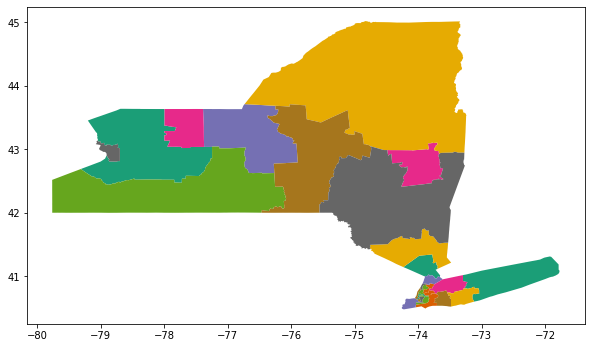

In [85]:
juris.plot(cmap='Dark2',figsize=(10,20))

## Incorporated and Unincorporated Places

### Data

In [86]:
incorp = dfDict['GU_IncorporatedPlace']
print(incorp.shape)
incorp.head()

(632, 18)


,Permanent_Identifier,Source_FeatureID,Source_DatasetID,Source_DataDesc,Source_Originator,Data_Security,Distribution_Policy,LoadDate,FCode,State_Name,Place_FIPSCode,Place_Name,Population2000,AreaSqKM,GNIS_ID,Shape_Length,Shape_Area,geometry
0,2e839a75-cb61-403a-b14e-713c58b18ce6,02391046,164ae9a7-1ae7-423a-88c5-eec7bbb7c1b3,Incorporated Place - 2018,US Census Bureau,5,E4,2019-03-20T00:00:00,61415,New York,36559,Oxford,None,4.588162,2391046,0.090417,0.000502,"MULTIPOLYGON (((-75.60965 42.45006, -75.60724 ..."
1,27b90616-efb9-4e2e-aa83-bb10e40bbdfd,02391183,164ae9a7-1ae7-423a-88c5-eec7bbb7c1b3,Incorporated Place - 2018,US Census Bureau,5,E4,2019-08-29T16:44:47,61415,New York,36768,Van Etten,None,2.253916,None,0.064742,0.000246,"MULTIPOLYGON (((-76.56590 42.19863, -76.56414 ..."
2,821fb9ba-4d22-493e-9118-9de19882c8db,02391085,164ae9a7-1ae7-423a-88c5-eec7bbb7c1b3,Incorporated Place - 2018,US Census Bureau,5,E4,2019-03-20T00:00:00,61415,New York,36604,Quogue,None,12.856055,2391085,0.154322,0.001372,"MULTIPOLYGON (((-72.62289 40.81636, -72.62274 ..."
3,0554a591-2acd-43a1-8fd1-a7982b01dc4b,02391063,164ae9a7-1ae7-423a-88c5-eec7bbb7c1b3,Incorporated Place - 2018,US Census Bureau,5,E4,2019-03-20T00:00:00,61415,New York,36576,Phoenix,None,3.340709,2391063,0.098345,0.000370,"MULTIPOLYGON (((-76.31191 43.23119, -76.31181 ..."
4,a9aa9e0d-e367-4974-b80f-d204b331c4fb,02390971,164ae9a7-1ae7-423a-88c5-eec7bbb7c1b3,Incorporated Place - 2018,US Census Bureau,5,E4,2019-03-20T00:00:00,61415,New York,36461,Maybrook,None,3.521753,2390971,0.129906,0.000380,"MULTIPOLYGON (((-74.22862 41.48485, -74.22583 ..."


In [87]:
unincorp = dfDict['GU_UnincorporatedPlace']
print(unincorp.shape)
unincorp.head()

(604, 17)


,Permanent_Identifier,Source_FeatureID,Source_DatasetID,Source_DataDesc,Source_Originator,Data_Security,Distribution_Policy,LoadDate,FCode,State_Name,Place_FIPSCode,Place_Name,AreaSqKM,GNIS_ID,Shape_Length,Shape_Area,geometry
0,a3bb04a5-fc47-419e-b142-6f3c4c4aef85,02390429,d837e40a-062e-4ff3-913f-a8388b04e8cf,Unincorporated Place - 2018,US Census Bureau,5,E4,2019-03-05T00:00:00,61501,New Jersey,34757,Vernon Valley,7.012485,2390429,0.134409,0.000753,"MULTIPOLYGON (((-74.50221 41.23463, -74.50212 ..."
1,d50f5073-5a42-4d82-9110-aa5cbd49e3d9,02389698,d837e40a-062e-4ff3-913f-a8388b04e8cf,Unincorporated Place - 2018,US Census Bureau,5,E4,2019-03-05T00:00:00,61501,New Jersey,34605,Port Reading,7.366286,2389698,0.151369,0.000783,"MULTIPOLYGON (((-74.26971 40.56644, -74.26962 ..."
2,5d8fca25-13a8-43d1-bc56-b309e41b7b18,02390280,d837e40a-062e-4ff3-913f-a8388b04e8cf,Unincorporated Place - 2018,US Census Bureau,5,E4,2019-03-05T00:00:00,61501,New Jersey,34667,Sewaren,2.721756,2390280,0.097456,0.000289,"MULTIPOLYGON (((-74.27094 40.55116, -74.27073 ..."
3,829f7821-4fdc-4b59-91f1-0062561def80,02389862,d837e40a-062e-4ff3-913f-a8388b04e8cf,Unincorporated Place - 2018,US Census Bureau,5,E4,2019-03-05T00:00:00,61501,New York,36295,Gordon Heights,4.449506,2389862,0.093644,0.000475,"MULTIPOLYGON (((-72.97858 40.87436, -72.97826 ..."
4,913b1bd7-3999-4f91-b72a-9a5b144e3086,02390408,d837e40a-062e-4ff3-913f-a8388b04e8cf,Unincorporated Place - 2018,US Census Bureau,5,E4,2019-03-05T00:00:00,61501,New York,36755,Tuckahoe,11.924641,2390408,0.212676,0.001274,"MULTIPOLYGON (((-72.47795 40.89842, -72.47713 ..."


### Map

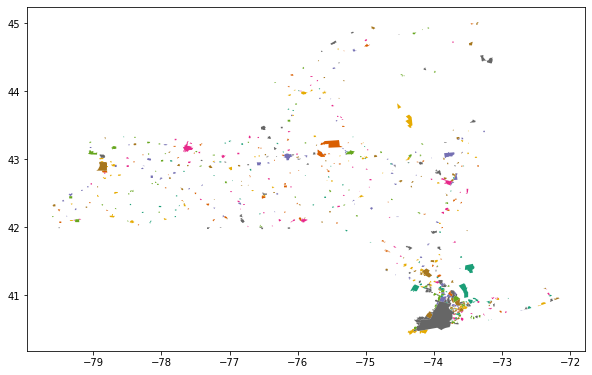

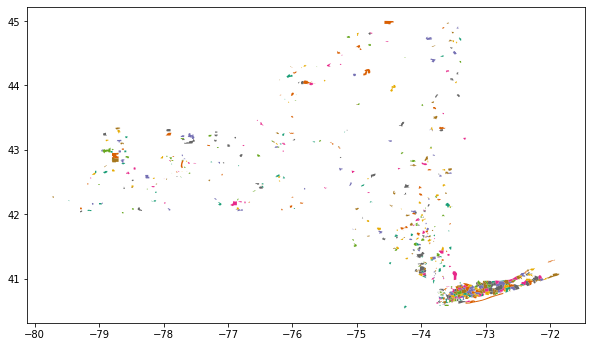

In [89]:
incorp.plot(cmap='Dark2',figsize=(10,20))
unincorp.plot(cmap='Dark2',figsize=(10,20))

## All

In [ ]:
reserves = dfDict['GU_Reserve']
print(reserves.shape)
reserves.head(n=64)

In [ ]:
for df in dfDict:
    print(df)
    if len(df) == 0:
        continue
    if df == 'GU_Reserve' or df == 'GU_NativeAmericanArea' :
        dfDict[df].plot(figsize=(12, 20))
    else:
        dfDict[df].loc[dfDict[df]['State_Name'] == 'New York'].plot(figsize=(12, 20))
        plt.title('{} in the State of New York'.format(df))
        
    

## Βιλιογραφία

<div class="cite2c-biblio"></div>